In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [4, 3]


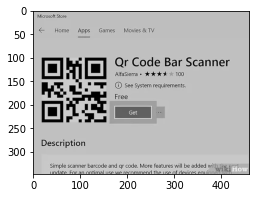

In [4]:
img = cv2.imread("qr.jpg", 0)
plt.imshow(img, cmap='gray')

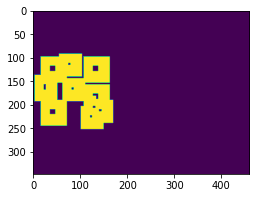

In [18]:
_, thresh = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

kernel_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_10 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
thresh_di = cv2.dilate(thresh, kernel_5, iterations=2)
thresh_di_er = cv2.erode(thresh_di, kernel_10, iterations=5)
mask = thresh_di_er - thresh_di

plt.imshow(mask)

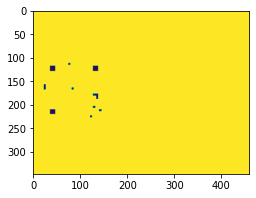

In [9]:
plt.imshow(thresh_di)

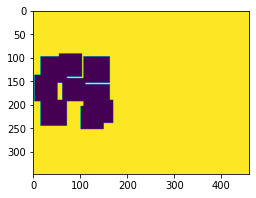

In [10]:
plt.imshow(thresh_di_er)

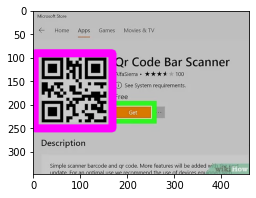

In [19]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_OG = cv2.imread('qr.jpg')
rotrect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rotrect)
box = np.int0(box)
img_draw = cv2.drawContours(img_OG, [box], 0, (255,0,255), 15)

plt.imshow(img_draw)